In [40]:
#import libraries
import yfinance as yf
import pandas   as pd
import numpy as np
import matplotlib.pyplot  as plt
from datetime import datetime
import datetime
%matplotlib inline





In [41]:
# Define the ticker symbol for NVDA
ticker = "NVDA"

# Get the current date
end_date = datetime.datetime.now()

# Calculate the date 200 days ago
start_date = end_date - datetime.timedelta(days=200)

# Download 1 day resolution data from Yahoo Finance
data = yf.download(ticker, start=start_date, end=end_date)
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-30,199.500000,201.399994,191.500000,191.619995,191.567642,48861100
2023-01-31,191.699997,196.869995,189.500000,195.369995,195.316605,49801700
2023-02-01,196.910004,211.919998,196.110001,209.429993,209.372772,66047700
2023-02-02,210.000000,219.490005,207.000000,217.089996,217.030670,56427600
2023-02-03,210.000000,217.449997,207.889999,211.000000,210.942337,42936600


In [42]:
#Creating feature
data['SMA10']=data['Adj Close'].rolling(10).mean()
data['SMA20']=data['Adj Close'].rolling(20).mean()
data['SMA30']=data['Adj Close'].rolling(30).mean()
data.head()

,Open,High,Low,Close,Adj Close,Volume,SMA10,SMA20,SMA30
Date,,,,,,,,,
2023-01-30,199.500000,201.399994,191.500000,191.619995,191.567642,48861100,NaN,NaN,NaN
2023-01-31,191.699997,196.869995,189.500000,195.369995,195.316605,49801700,NaN,NaN,NaN
2023-02-01,196.910004,211.919998,196.110001,209.429993,209.372772,66047700,NaN,NaN,NaN
2023-02-02,210.000000,219.490005,207.000000,217.089996,217.030670,56427600,NaN,NaN,NaN
2023-02-03,210.000000,217.449997,207.889999,211.000000,210.942337,42936600,NaN,NaN,NaN


<Axes: xlabel='Date'>

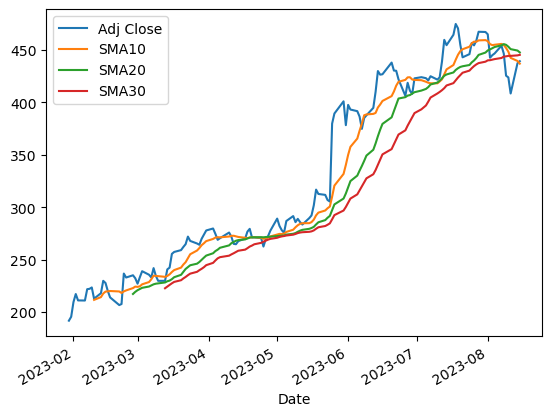

In [43]:
#visualization
data[['Adj Close','SMA10','SMA20','SMA30']].plot()

In [44]:
data['Position1'] = 0
data.loc[data['SMA10'] > data['SMA20'], 'Position1'] = 1  # Buy  stock
data.loc[data['SMA10'] < data['SMA20'], 'Position1'] = -1 # Sell stock
data.head()
 

,Open,High,Low,Close,Adj Close,Volume,SMA10,SMA20,SMA30,Position1
Date,,,,,,,,,,
2023-01-30,199.500000,201.399994,191.500000,191.619995,191.567642,48861100,NaN,NaN,NaN,0
2023-01-31,191.699997,196.869995,189.500000,195.369995,195.316605,49801700,NaN,NaN,NaN,0
2023-02-01,196.910004,211.919998,196.110001,209.429993,209.372772,66047700,NaN,NaN,NaN,0
2023-02-02,210.000000,219.490005,207.000000,217.089996,217.030670,56427600,NaN,NaN,NaN,0
2023-02-03,210.000000,217.449997,207.889999,211.000000,210.942337,42936600,NaN,NaN,NaN,0


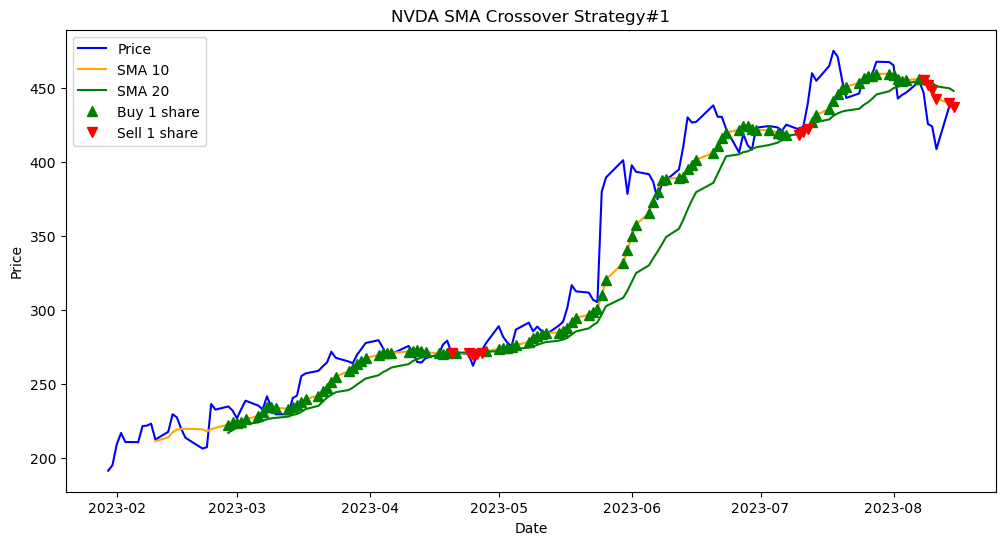

In [45]:

# Plotting the strategy 1
plt.figure(figsize=(12, 6))
plt.plot(data['Adj Close'], label='Price', color='blue')
plt.plot(data['SMA10'], label='SMA 10', color='orange')
plt.plot(data['SMA20'], label='SMA 20', color='green')


# Buy signals
plt.plot(data[data['Position1'] == 1].index, data[data['Position1'] == 1]['SMA10'], '^', markersize=7, color='g', label='Buy 1 share')

# Sell signals
plt.plot(data[data['Position1'] == -1].index, data[data['Position1'] == -1]['SMA10'], 'v', markersize=7, color='r', label='Sell 1 share')


plt.title('NVDA SMA Crossover Strategy#1')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [46]:
# Strategy 2
data['Position2'] = 0
data.loc[data['SMA10'] > data['SMA30'], 'Position2'] = 1  # Buy signal
data.loc[data['SMA10'] < data['SMA30'], 'Position2'] = -1  # Sell signal
data.head()
 

,Open,High,Low,Close,Adj Close,Volume,SMA10,SMA20,SMA30,Position1,Position2
Date,,,,,,,,,,,
2023-01-30,199.500000,201.399994,191.500000,191.619995,191.567642,48861100,NaN,NaN,NaN,0,0
2023-01-31,191.699997,196.869995,189.500000,195.369995,195.316605,49801700,NaN,NaN,NaN,0,0
2023-02-01,196.910004,211.919998,196.110001,209.429993,209.372772,66047700,NaN,NaN,NaN,0,0
2023-02-02,210.000000,219.490005,207.000000,217.089996,217.030670,56427600,NaN,NaN,NaN,0,0
2023-02-03,210.000000,217.449997,207.889999,211.000000,210.942337,42936600,NaN,NaN,NaN,0,0


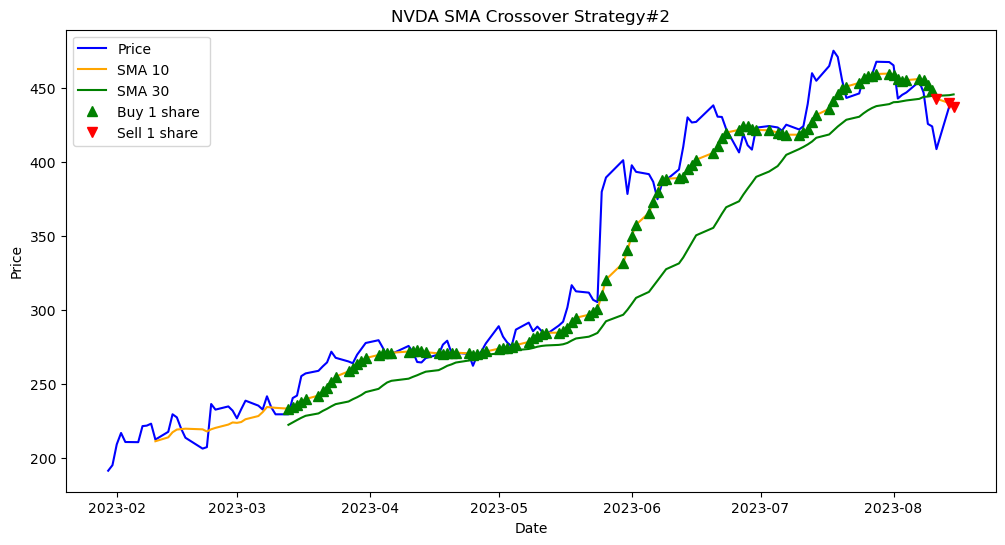

In [47]:
# Plotting the strategy 2
plt.figure(figsize=(12, 6))
plt.plot(data['Adj Close'], label='Price', color='blue')
plt.plot(data['SMA10'], label='SMA 10', color='orange')
plt.plot(data['SMA30'], label='SMA 30', color='green')


# Buy signals
plt.plot(data[data['Position2'] == 1].index, data[data['Position2'] == 1]['SMA10'], '^', markersize=7, color='g', label='Buy 1 share ')

# Sell signals
plt.plot(data[data['Position2'] == -1].index, data[data['Position2'] == -1]['SMA10'], 'v', markersize=7, color='r', label='Sell 1 share')


plt.title('NVDA SMA Crossover Strategy#2')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [48]:
data['Returns1'] = data['Position1'].shift(1) * data['Adj Close'].pct_change()
data['Returns2'] = data['Position2'].shift(1) * data['Adj Close'].pct_change()
data.head()

,Open,High,Low,Close,Adj Close,Volume,SMA10,SMA20,SMA30,Position1,Position2,Returns1,Returns2
Date,,,,,,,,,,,,,
2023-01-30,199.500000,201.399994,191.500000,191.619995,191.567642,48861100,NaN,NaN,NaN,0,0,NaN,NaN
2023-01-31,191.699997,196.869995,189.500000,195.369995,195.316605,49801700,NaN,NaN,NaN,0,0,0.0,0.0
2023-02-01,196.910004,211.919998,196.110001,209.429993,209.372772,66047700,NaN,NaN,NaN,0,0,0.0,0.0
2023-02-02,210.000000,219.490005,207.000000,217.089996,217.030670,56427600,NaN,NaN,NaN,0,0,0.0,0.0
2023-02-03,210.000000,217.449997,207.889999,211.000000,210.942337,42936600,NaN,NaN,NaN,0,0,-0.0,-0.0


In [49]:
# Calculate cumulative returns
data['Cumulative Returns1'] = (1 + data['Returns1']).cumprod()
data['Cumulative Returns2'] = (1 +data['Returns2']).cumprod()

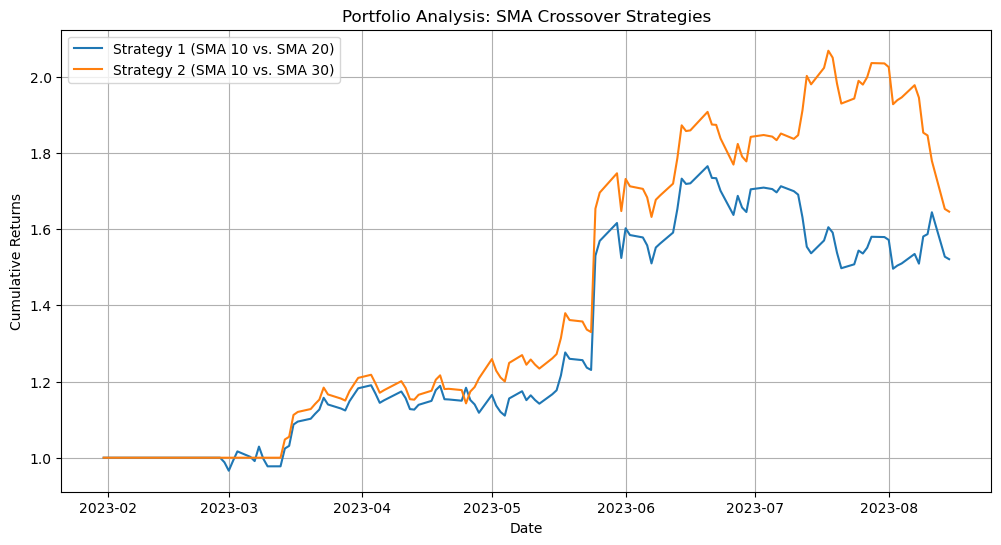

In [50]:
# Plotting the cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Cumulative Returns1'], label='Strategy 1 (SMA 10 vs. SMA 20)')
plt.plot(data.index, data['Cumulative Returns2'], label='Strategy 2 (SMA 10 vs. SMA 30)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Portfolio Analysis: SMA Crossover Strategies')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
metrics = {
    'Total Return 1': data['Returns1'].sum(),
    'Total Return 2':  data['Returns2'].sum(),
    'Annualized Return 1': ((1 +  data['Returns1'].mean()) ** 252) - 1,  # Assuming 252 trading days in a year
    'Annualized Return 2': ((1 +  data['Returns2'].mean()) ** 252) - 1,
    'Sharpe Ratio 1':  data['Returns1'].mean() /  data['Returns1'].std() * np.sqrt(252),
    'Sharpe Ratio 2':  data['Returns2'].mean() /  data['Returns2'].std() * np.sqrt(252),
    'Maximum Drawdown 1': (data['Cumulative Returns1'].min() - data['Cumulative Returns1'].max()) / data['Cumulative Returns1'].max(),
    'Maximum Drawdown 2': (data['Cumulative Returns2'].min() - data['Cumulative Returns2'].max()) / data['Cumulative Returns2'].max(),
    'Number of Trades 1':  data['Position1'].diff().abs().sum() / 2,  # Assuming each trade involves both buy and sell
    'Number of Trades 2':  data['Position2'].diff().abs().sum() / 2,
    'Win Rate 1': ( data['Returns1'] > 0).mean(),
    'Win Rate 2': ( data['Returns2'] > 0).mean()
}
for metric, value in metrics.items():
    print(f'{metric}: {value}')


Total Return 1: 0.47834926728534954
Total Return 2: 0.5546474314234089
Annualized Return 1: 1.4224948194691547
Annualized Return 2: 1.788877140074118
Sharpe Ratio 1: 1.8385012740934483
Sharpe Ratio 2: 2.1824342315984557
Maximum Drawdown 1: -0.4528319819595201
Maximum Drawdown 2: -0.5164942002208596
Number of Trades 1: 7.5
Number of Trades 2: 1.5
Win Rate 1: 0.4233576642335766
Win Rate 2: 0.41605839416058393


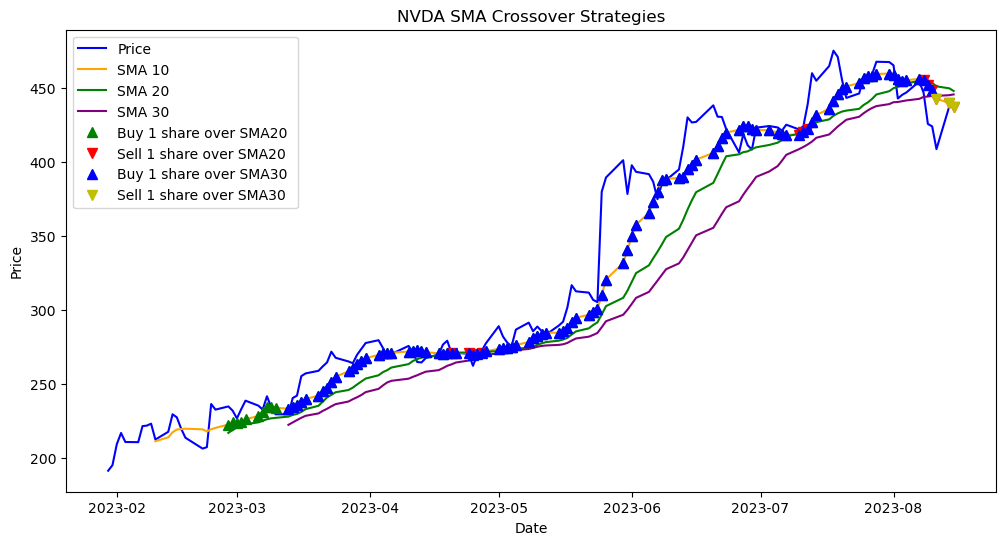

In [52]:
# Plotting the strategies
plt.figure(figsize=(12, 6))
plt.plot(data['Adj Close'], label='Price', color='blue')
plt.plot(data['SMA10'], label='SMA 10', color='orange')
plt.plot(data['SMA20'], label='SMA 20', color='green')
plt.plot(data['SMA30'], label='SMA 30', color='purple')
# Buy/sell signals for Strategy 1
plt.plot(data[data['Position1'] == 1].index, data[data['Position1'] == 1]['SMA10'], '^', markersize=7, color='g', label='Buy 1 share over SMA20 ')
plt.plot(data[data['Position1'] == -1].index, data[data['Position1'] == -1]['SMA10'], 'v', markersize=7, color='r', label='Sell 1 share over SMA20 ')

# Buy/sell signals for Strategy 2
plt.plot(data[data['Position2'] == 1].index, data[data['Position2'] == 1]['SMA10'], '^', markersize=7, color='b', label='Buy 1 share over SMA30 ')
plt.plot(data[data['Position2'] == -1].index, data[data['Position2'] == -1]['SMA10'], 'v', markersize=7, color='y', label='Sell 1 share over SMA30 ')

plt.title('NVDA SMA Crossover Strategies')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

